# Tensorflow(keras)를 활용한 손글씨(숫자) 인식​
---

## 1. 프로젝트 선정 이유, 프로젝트 환경

 * 증강현실 등 다양한 혁신기술들이 점차 일상생활에 적용되고 있다. 향후 실생활과 네트워크의 가교 역할을 하는 기술에 대한 수요는 지속적으로 증가할 것으로 예상된다. 여기서 OCR은 가장 기본적이면서도 핵심적인 기술이 될 것이다. 특히 숫자는 온라인과 오프라인 양 측에서 모두 핵심적인 정보전달 수단으로 쓰이고 있다. 전화번호, 우편번호 등 다양한 숫자 정보들이 실생활에서 수기로 쓰여지고 있어 디지털 자료로 전환될 필요 여지가 있다. 이러한 정보들은 기존의 방식으로는 디지털화가 어려웠으나, 인공신경망 기술은 기존에는 처리하기 어려웠던 자료들도 처리할 수 있게 하였다. 따라서 이 프로젝트에서는 인공신경망을 구축하여 수기로 쓰여져 이미지 형태로 저장된 데이터를 컴퓨터가 처리할 수 있는 디지털 형태의 자료로 만드는 것을 목표로 하였다.​

 * 사용 언어
  * Python
  * 리눅스

 * 사용 도구
  * Tensorflow
  * keras

## 2. 사전 준비

In [ ]:
# 관련 도구 라이브러리 불러오기
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AvgPool2D, Flatten,Dense, Dropout,MaxPool2D
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import os

In [ ]:
# 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 데이터 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

## 3. 데이터셋 탐색

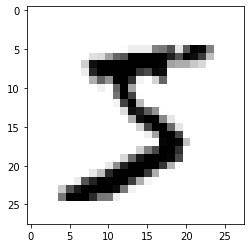

In [ ]:
plt.imshow(train_images[0], cmap=plt.cm.binary)

In [ ]:
class_names = [0,1,2,3,4,5,6,7,8,9]

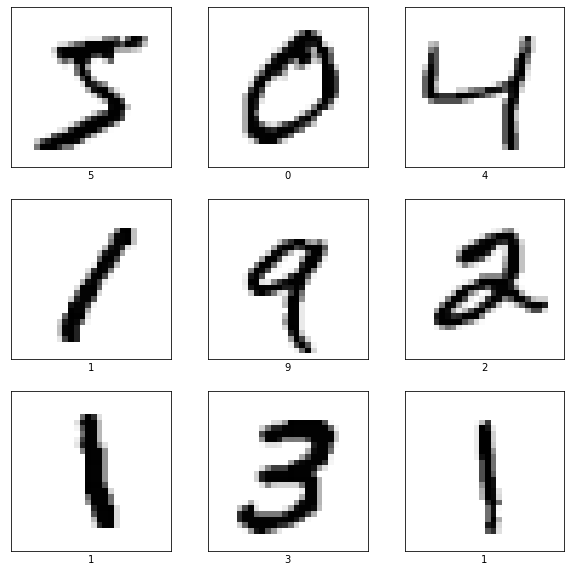

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4. 베이스라인 모델

가장 기본적인 형태의 ANN(인공신경망) 모델
 * 입력층 : 이미지를 각각의 픽셀 한 개 씩 1차원으로 입력
 * 은닉층 : 64개의 노드를 가진 Fully Connected Layer 6층
 * 출력층 : 0~9까지 10개의 결과를 출력할 수 있는 10개의 노드



In [ ]:
baseline = Sequential([
    Flatten(input_shape=(28, 28,1), name="flatten_1"),
    Dense(64, activation='relu', name="dense_1"),
    Dense(64, activation='relu',name="dense_2"),
    Dense(64, activation='relu',name="dense_3"),
    Dense(64, activation='relu',name="dense_4"),
    Dense(64, activation='relu',name="dense_5"),
    Dense(64, activation='relu',name="dense_6"),
    Dense(10, activation='softmax',name="dense_7")
],name="baseline")

In [ ]:
baseline.summary()

Model: "baseline"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                416

In [ ]:
baseline.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = baseline.fit(train_images, train_labels, epochs=30,
                     validation_split=0.2, callbacks=[cp_callback])

Epoch 1/30
1500/1500 [==============================] - 9s 6ms/step - loss: 1.3204 - accuracy: 0.5787 - val_loss: 0.5064 - val_accuracy: 0.8536
Epoch 2/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3746 - accuracy: 0.8897 - val_loss: 0.2766 - val_accuracy: 0.9201
Epoch 3/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2573 - accuracy: 0.9241 - val_loss: 0.2252 - val_accuracy: 0.9326
Epoch 4/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2023 - accuracy: 0.9409 - val_loss: 0.1880 - val_accuracy: 0.9456
Epoch 5/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1674 - accuracy: 0.9506 - val_loss: 0.1720 - val_accuracy: 0.9482
Epoch 6/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1443 - accuracy: 0.9579 - val_loss: 0.1483 - val_accuracy: 0.9568
Epoch 7/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1274 - accuracy: 0.9617 - val_loss: 0.1546 - val_accuracy:

In [ ]:
history_dict=history.history

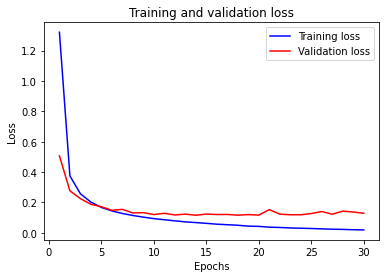

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')

plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

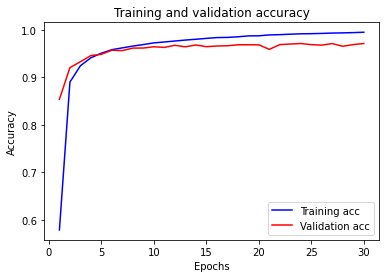

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
for i in range(20):
    if (min(history.history['val_loss'])==history.history['val_loss'][i]):
        print(i+1)
for i in range(20):
    if (max(history.history['val_accuracy'])==history.history['val_accuracy'][i]):
        print(i+1)

14


 * 훈련 결과 가장 좋은 결과는 Epoch 14

In [ ]:
baseline.load_weights('C:/Users/user/Desktop/cpkt/cp--0014.ckpt')

In [ ]:
test_loss, test_acc = baseline.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.1133 - accuracy: 0.9660 - 906ms/epoch - 3ms/step


ANN 모델의 장점과 한계

 * 장점
  * 비교적 단순한 구조의 인공신경망으로도 약 97% 정확도의 상당한 수준의 결과를 얻을 수 있음

 * 한계
  * 이미지 처리에 최적화되지 않은 학습 방식
